In [33]:
# Title: Titanic Survival Prediction - CodSoft Task 1
# Author: [Your Name]
# Description: Machine learning model to predict Titanic passenger survival

# Install required packages (if not already installed)
!pip install pandas numpy matplotlib seaborn scikit-learn

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [34]:
import pandas as pd



# Load the Titanic dataset
# You can download from: https://www.kaggle.com/c/titanic/data
# For this example, I'll load from a URL or you can upload the file to Colab

# Method 1: Load from URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Method 2: If you have downloaded the file, upload it to Colab and use:
# from google.colab import files
# uploaded = files.upload()
# titanic_data = pd.read_csv('titanic.csv')

# Display basic information about the dataset
print("Dataset Shape:", titanic_data.shape)
print("\nFirst 5 rows:")
display(titanic_data.head())

print("\nDataset Info:")
titanic_data.info()

print("\nStatistical Summary:")
display(titanic_data.describe())

print("\nMissing Values:")
print(titanic_data.isnull().sum())


Dataset Shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Statistical Summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


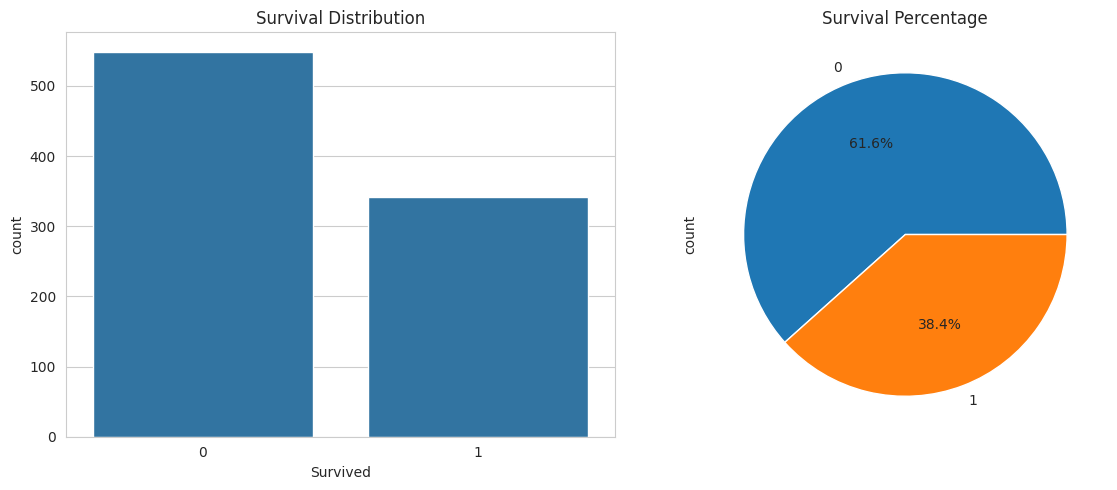

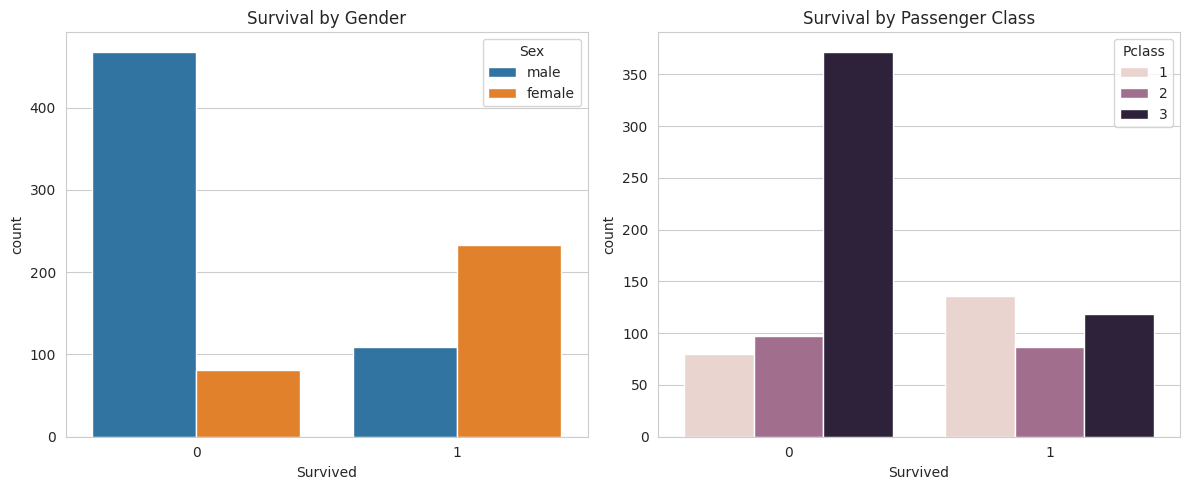

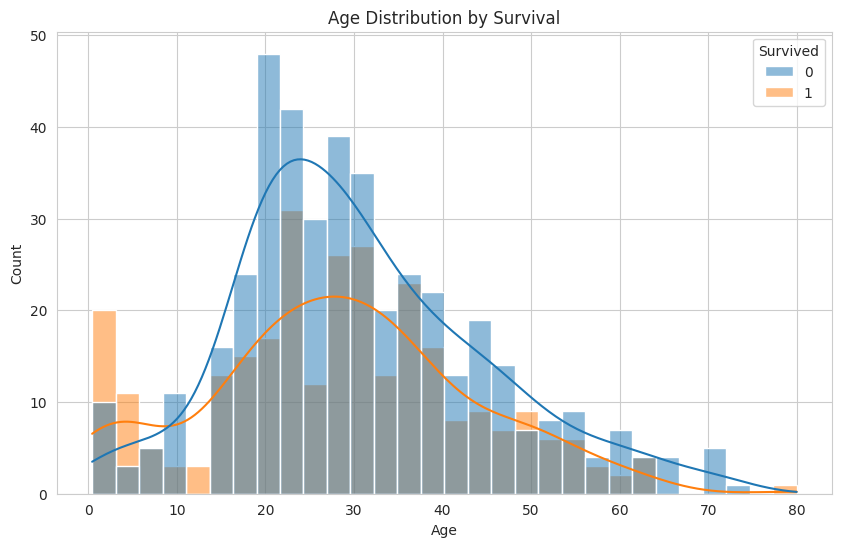

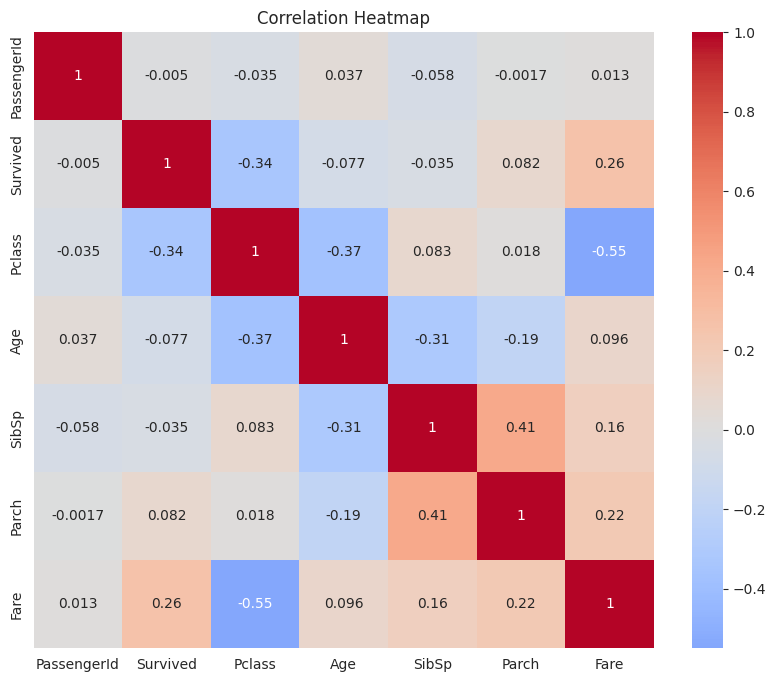

In [35]:
# Survival distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Distribution')

plt.subplot(1, 2, 2)
titanic_data['Survived'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Survival Percentage')

plt.tight_layout()
plt.show()

# Survival by gender
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Survival by Gender')

plt.subplot(1, 2, 2)
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)
plt.title('Survival by Passenger Class')

plt.tight_layout()
plt.show()

# Age distribution by survival
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Age Distribution by Survival')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_cols = titanic_data.select_dtypes(include=[np.number]).columns
sns.heatmap(titanic_data[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [36]:
# Create a copy of the dataset for preprocessing
df = titanic_data.copy()

# Handle missing values
print("Missing values before preprocessing:")
print(df.isnull().sum())

# Fill Age with median based on Pclass and Sex
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column (too many missing values) and PassengerId (not useful for prediction)
df.drop(['Cabin', 'PassengerId'], axis=1, inplace=True)

# Create new features
# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Is alone
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Title extraction from Name


Missing values before preprocessing:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [37]:
# Title extraction from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
    'Mlle': 'Miss', 'Ms': 'Miss', 'Lady': 'Rare', 'Countess': 'Rare',
    'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Mrs', 'Capt': 'Rare',
    'Sir': 'Rare', 'Jonkheer': 'Rare'
}
df['Title'] = df['Title'].map(title_mapping)

print("Title distribution:")
print(df['Title'].value_counts())


Title distribution:
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


In [38]:
# Encode categorical variables
label_encoders = {}
categorical_cols = ['Sex', 'Embarked', 'Title']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

print("Categorical variables encoded successfully!")


Categorical variables encoded successfully!


In [39]:
# Select final features for modeling
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
            'FamilySize', 'IsAlone', 'Title']

X = df[features]
y = df['Survived']

print("Final features:", features)
print("X shape:", X.shape)
print("y shape:", y.shape)



Final features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
X shape: (891, 10)
y shape: (891,)


In [40]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

Training set size: (712, 10)
Testing set size: (179, 10)

Class distribution in training set:
Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64


In [41]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    if name == 'Logistic Regression':
        # Scale features for Logistic Regression
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.3f}")


Random Forest Accuracy: 0.821
Logistic Regression Accuracy: 0.810
Gradient Boosting Accuracy: 0.804


In [42]:
# Compare model performance
print("🔍 MODEL COMPARISON")
print("=" * 30)
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.2%}")

# Select best model
best_model_name = max(results, key=results.get)
print(f"\n🏆 Best Model: {best_model_name} ({results[best_model_name]:.2%})")




🔍 MODEL COMPARISON
Random Forest: 82.12%
Logistic Regression: 81.01%
Gradient Boosting: 80.45%

🏆 Best Model: Random Forest (82.12%)


In [43]:
# Detailed evaluation of best model
if best_model_name == 'Logistic Regression':
    best_model = models['Logistic Regression']
    X_test_processed = X_test_scaled
else:
    best_model = models[best_model_name]
    X_test_processed = X_test

y_pred_best = best_model.predict(X_test_processed)

print(f"📊 {best_model_name} - Detailed Evaluation")
print("=" * 40)
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

📊 Random Forest - Detailed Evaluation
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Confusion Matrix:
[[96 14]
 [18 51]]


In [44]:
# Cross-validation for better evaluation
if best_model_name == 'Logistic Regression':
    cv_scores = cross_val_score(best_model, scaler.fit_transform(X), y, cv=5)
else:
    cv_scores = cross_val_score(best_model, X, y, cv=5)

print(f"📈 {best_model_name} - Cross Validation Results")
print("=" * 40)
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

📈 Random Forest - Cross Validation Results
CV Scores: [0.81005587 0.79775281 0.85955056 0.76404494 0.8258427 ]
Mean CV Accuracy: 0.811 (+/- 0.063)


📊 Feature Importance
      feature  importance
5        Fare    0.251002
2         Age    0.222252
1         Sex    0.201802
9       Title    0.103107
0      Pclass    0.077835
7  FamilySize    0.046458
6    Embarked    0.034275
3       SibSp    0.029187
4       Parch    0.021865
8     IsAlone    0.012217


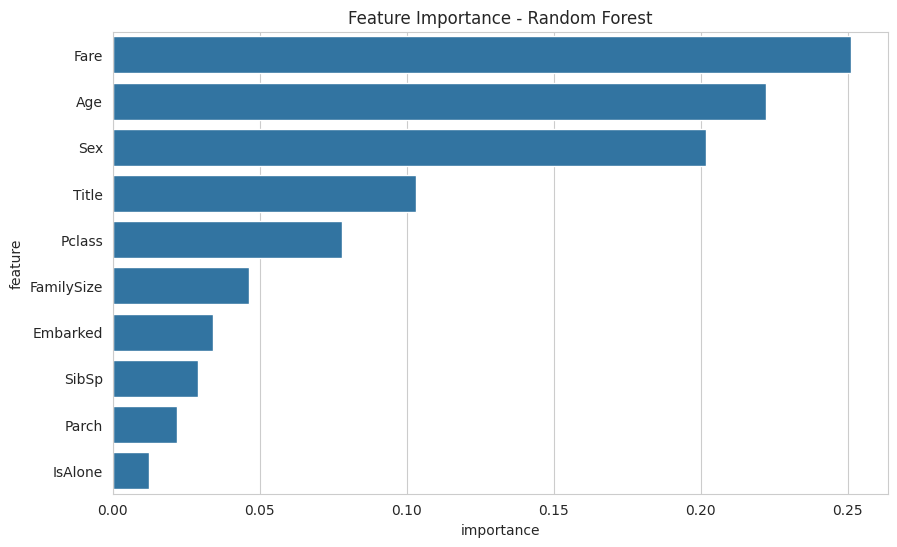

In [45]:
# Feature importance for tree-based models
if best_model_name in ['Random Forest', 'Gradient Boosting']:
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("📊 Feature Importance")
    print("=" * 30)
    print(feature_importance)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title(f'Feature Importance - {best_model_name}')
    plt.show()

In [46]:
# Example prediction
example_passenger = {
    'Pclass': 1, 'Sex': 0, 'Age': 25, 'SibSp': 0, 'Parch': 0,
    'Fare': 50, 'Embarked': 1, 'FamilySize': 1, 'IsAlone': 1, 'Title': 2
}

example_df = pd.DataFrame([example_passenger])

if best_model_name == 'Logistic Regression':
    example_scaled = scaler.transform(example_df)
    prediction = best_model.predict(example_scaled)
else:
    prediction = best_model.predict(example_df)

result = "Survived 🎉" if prediction[0] == 1 else "Did not survive 💔"
print(f"Prediction for example passenger: {result}")

Prediction for example passenger: Survived 🎉


In [47]:
print("✅ TITANIC SURVIVAL PREDICTION PROJECT COMPLETED!")
print("=" * 50)
print(f"Best Model: {best_model_name}")
print(f"Test Accuracy: {results[best_model_name]:.2%}")
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2%}")
print("\n📋 Features Used:")
for i, feature in enumerate(features, 1):
    print(f"{i}. {feature}")

✅ TITANIC SURVIVAL PREDICTION PROJECT COMPLETED!
Best Model: Random Forest
Test Accuracy: 82.12%
Cross-Validation Accuracy: 81.14%

📋 Features Used:
1. Pclass
2. Sex
3. Age
4. SibSp
5. Parch
6. Fare
7. Embarked
8. FamilySize
9. IsAlone
10. Title
